Dataset loaded successfully!
Shape: (7043, 21)

Columns:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing Values:
 customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Target Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Train shape: (5634, 19) Test shape: (1409, 19)
After SMOTE: [4139 4139]


/tmp/ipython-input-1904745872.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)



🎯 Random Forest Accuracy: 78.14 %


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:32:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🎯 XGBoost Accuracy: 76.79 %

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1035
           1       0.56      0.59      0.58       374

    accuracy                           0.77      1409
   macro avg       0.70      0.71      0.71      1409
weighted avg       0.77      0.77      0.77      1409



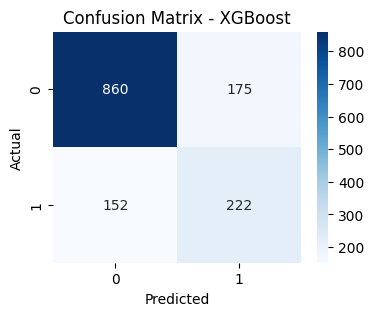

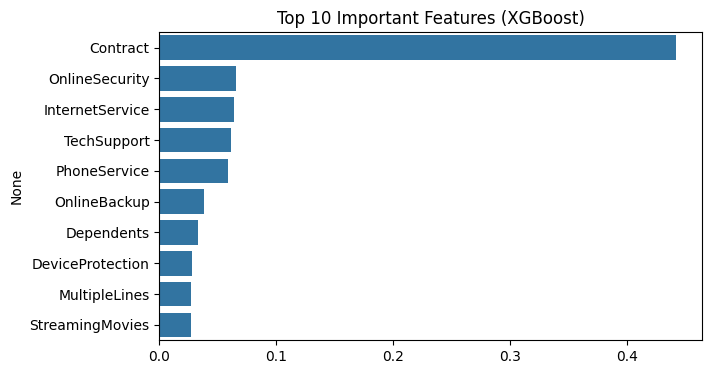


✅ Project Completed Successfully!


In [2]:
# =============================================
# 📘 Customer Churn Prediction (Basic Version)
# Author: Hassan daood
# =============================================

# ✅ Step 1: Install libraries (only first run)
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost imbalanced-learn

# ✅ Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# ✅ Step 3: Load dataset (Telco Churn from online source)
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)
print("Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()

# ✅ Step 4: Basic Info
print("\nColumns:")
print(df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum().head())
print("\nTarget Distribution:")
print(df["Churn"].value_counts())

# ✅ Step 5: Data Cleaning
# Convert TotalCharges to numeric (some values are blank)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Drop customerID (not useful)
df.drop("customerID", axis=1, inplace=True)

# ✅ Step 6: Encode categorical variables
cat_cols = df.select_dtypes(include="object").columns.tolist()
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# ✅ Step 7: Split features & target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# ✅ Step 8: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("\nTrain shape:", X_train.shape, "Test shape:", X_test.shape)

# ✅ Step 9: Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
print("After SMOTE:", np.bincount(y_train_bal))

# ✅ Step 10: Feature scaling
scaler = StandardScaler()
X_train_bal = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# ✅ Step 11: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test_scaled)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("\n🎯 Random Forest Accuracy:", round(acc_rf * 100, 2), "%")

# ✅ Step 12: Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train_bal, y_train_bal)
y_pred_xgb = xgb.predict(X_test_scaled)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("🎯 XGBoost Accuracy:", round(acc_xgb * 100, 2), "%")

# ✅ Step 13: Compare Results
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

# ✅ Step 14: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# ✅ Step 15: Feature Importance (XGBoost)
importances = xgb.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)[:10]
plt.figure(figsize=(7,4))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Top 10 Important Features (XGBoost)")
plt.show()

print("\n✅ Project Completed Successfully!")
